In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange

In [7]:
train_data = pd.read_csv("./data/training.csv")
test_data = pd.read_csv("./data/test.csv")
train_data.fillna(method='ffill', inplace=True)

In [8]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
train_data.shape

(7049, 31)

In [10]:
train_data.tail(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
7048,66.938311,43.42451,31.096059,39.528604,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,73.033339,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,45.90048,82.773096,53 62 67 76 86 91 97 105 105 106 107 108 112 1...


In [11]:
len(train_data), len(test_data)

(7049, 1783)

In [12]:
len(test_data.Image[0].split(' '))

9216

In [13]:
def append_X(X):
    return [np.asarray(image.split(' '), dtype= 'float').reshape(96, 96) for image in X.Image]

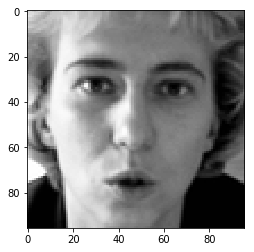

In [14]:
X_train = append_X(train_data) 
plt.imshow(X_train[1],cmap='gray')
plt.show()

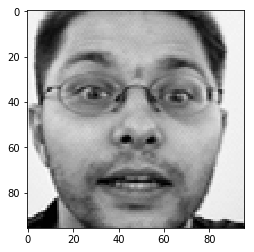

In [15]:
X_test = append_X(test_data) 
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [16]:
# taking keypoints data from csv, except full Image
y = train_data.iloc[:, :-1].values

In [17]:
print(len(X_train))


def keypoints_show(x, y=None):
    plt.imshow(x, 'gray')
    if y is not None:
        points = np.vstack(np.split(y, 15)).T
        plt.plot(points[0], points[1], 'o', color='red')
    plt.axis('off')   


7049


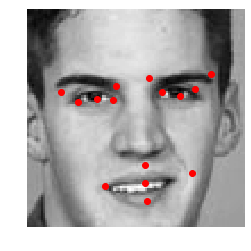

In [18]:
sample_idx = np.random.choice(len(X_train))

y[sample_idx]

keypoints_show(X_train[sample_idx], y[sample_idx])

In [45]:
def computecost(X,y, theta):
    
    """ return : Cost function """
        
    #hypothesis
    h = np.dot(X ,theta)
    error = h-y
    loss = np.power(error,2)
    J = np.sum(loss)/(2*m)
   
    return J

In [32]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [53]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in trange(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [65]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (theta.T @ X - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    return theta,cost

In [66]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    print(X.shape, one_column.shape)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [74]:
X = np.array([image.flatten() for image in X_train])
theta  = (np.zeros((X.shape[1],1)))
one_column = np.ones((X.shape[0],1))
X = np.concatenate((one_column, X), axis=1)
print(theta.shape)
g, cost = gradient_descent(X, y, theta, alpha, iterations)

(9216, 1)


In [59]:
y[:,0] / 96

array([0.68784962, 0.67013475, 0.67767763, ..., 0.69469512, 0.73921961,
       0.69727407])

In [47]:
# reg = linear_model.LinearRegression()
# reg.fit(X, y[...,0])
print(y[..., 0].shape, theta.shape)

(7049,) (1, 9217)


In [62]:
reg.score(X, y[..., 0])

0.9696924650809428

In [21]:
reg.predict(X)

array([66.03358456, 64.33294764, 65.05708268, ..., 66.6907353 ,
       70.96511474, 66.73536258])

In [1]:
def least_square_predictor(X, y):
    A = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
    beta = np.dot(np.linalg.inv(np.dot(A.T, A)),np.dot(A.T, y))
    return beta 

In [39]:
predictor = least_square_predictor(X / 255 , y[..., 0] / 96)

In [45]:
A = np.concatenate((np.ones((X.shape[0], 1)), X/255), axis = 1)
np.dot(A[0], predictor)


237.23498868766953

In [49]:
l = np.dot(A, predictor) - y[..., 0]
np.dot(l, l)

49180704743.440155

In [44]:
y/96

array([[0.68784962, 0.40627368, 0.31486466, ..., 0.75974436, 0.4492782 ,
        0.88006015],
       [0.67013475, 0.36427163, 0.31197163, ..., 0.73194326, 0.47362411,
        0.89041844],
       [0.67767763, 0.36364211, 0.32191447, ..., 0.73116447, 0.49244737,
        0.81936842],
       ...,
       [0.69469512, 0.38380439, 0.32985854, ..., 0.79128742, 0.51523512,
        0.81372   ],
       [0.73921961, 0.41514235, 0.31815922, ..., 0.79128742, 0.52151235,
        0.82902549],
       [0.69727407, 0.45233864, 0.32391728, ..., 0.79128742, 0.47813   ,
        0.86221975]])

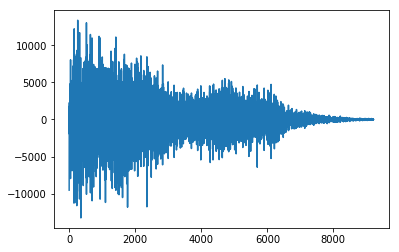

In [106]:
plt.plot(beta)

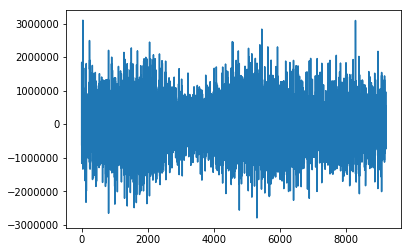

In [107]:
plt.plot(reg.coef_)